# Апробация модели мультиэкспоненциального частотного скана на данных из набора "1564ЛЕ1 при разных U1 Ur август 2022"

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

## 0. Импорт модулей

In [2]:
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from pydlts.fsmodels import SklMultiExpFrequencyScan, SklSingleExpFrequencyScan

from pydlts.fsplots import plot_experimental_points
from pydlts.fsplots import plot_spectr
from pydlts.fsplots import plot_model
from pydlts.fsplots import plot_loss_path
from pydlts.fsplots import plot_deviations

%matplotlib inline

## 1. Чтение данных

In [3]:
DATASET_PATH = '../datasets/'
PLOTS_PATH = '../plots/'
MODELS_PATH = '../models/'

In [4]:
file_names = listdir(DATASET_PATH)

In [5]:
u1 = -4
ur = -5

data_frames = [[file_name, pd.read_csv(DATASET_PATH + file_name, parse_dates=[0])] for file_name in file_names]

condition = lambda frame: frame.loc[0, 'u1']==u1 and frame.loc[0, 'ur']==ur
data_frames = [[name, frame] for [name, frame] in data_frames if condition(frame)]

In [6]:
len(data_frames)

3

In [7]:
print(data_frames[0][0])
data_frames[0][1].head()

1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_+10С_-4В-5В_50мВ_10мкс_шаг_0,01.csv


,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,time_between_meas,integral_time,specimen_name
0,2022-08-04 15:21:09,2500.0000,3.122,283.194,0.001561,1,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
1,2022-08-04 15:21:13,2443.0925,3.187,283.187,0.001593,1,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
2,2022-08-04 15:21:17,2387.4812,3.201,283.191,0.001600,1,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
3,2022-08-04 15:21:21,2333.1355,3.259,283.206,0.001629,1,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
4,2022-08-04 15:21:25,2280.0269,3.271,283.199,0.001636,1,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1


In [8]:
data_frames[0][1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               340 non-null    datetime64[ns]
 1   frequency_hz       340 non-null    float64       
 2   dlts_v             340 non-null    float64       
 3   temperature_k      340 non-null    float64       
 4   dlts_pf            340 non-null    float64       
 5   bs                 340 non-null    int64         
 6   ls                 340 non-null    int64         
 7   f_pulse            340 non-null    float64       
 8   u1                 340 non-null    float64       
 9   ur                 340 non-null    float64       
 10  time_between_meas  340 non-null    float64       
 11  integral_time      340 non-null    float64       
 12  specimen_name      340 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usag

In [9]:
print(data_frames[1][0])
data_frames[1][1].head()

1564ЛЕ1№1_п1_2500Гц-1Гц_10пФ_+30С_-4В-5В_50мВ_10мкс_шаг_0,1.csv


,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,time_between_meas,integral_time,specimen_name
0,2022-08-03 14:34:48,2500.0000,1.456,303.264,0.007280,10,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
1,2022-08-03 14:34:52,1985.8207,1.526,303.276,0.007630,10,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
2,2022-08-03 14:34:56,1577.3937,1.649,303.279,0.008245,10,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
3,2022-08-03 14:35:00,1252.9686,1.755,303.281,0.008775,10,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
4,2022-08-03 14:35:03,995.2686,1.907,303.281,0.009535,10,50,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1


In [10]:
data_frames[1][1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               34 non-null     datetime64[ns]
 1   frequency_hz       34 non-null     float64       
 2   dlts_v             34 non-null     float64       
 3   temperature_k      34 non-null     float64       
 4   dlts_pf            34 non-null     float64       
 5   bs                 34 non-null     int64         
 6   ls                 34 non-null     int64         
 7   f_pulse            34 non-null     float64       
 8   u1                 34 non-null     float64       
 9   ur                 34 non-null     float64       
 10  time_between_meas  34 non-null     float64       
 11  integral_time      34 non-null     float64       
 12  specimen_name      34 non-null     object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage:

In [11]:
print(data_frames[2][0])
data_frames[2][1].head()

1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_-10С_-4В-5В_10мВ_10мкс_шаг_0,01.csv


,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,time_between_meas,integral_time,specimen_name
0,2022-08-02 17:55:01,2500.0000,5.276,262.940,0.000528,1,10,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
1,2022-08-02 17:55:05,2443.0925,5.449,262.941,0.000545,1,10,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
2,2022-08-02 17:55:09,2387.4812,5.855,262.941,0.000585,1,10,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
3,2022-08-02 17:55:13,2333.1355,6.665,262.940,0.000666,1,10,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1
4,2022-08-02 17:55:17,2280.0269,6.626,262.936,0.000663,1,10,10.0,-4.0,-5.0,3.5,3.0,1564ЛЕ1№1 п1


In [12]:
data_frames[2][1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               340 non-null    datetime64[ns]
 1   frequency_hz       340 non-null    float64       
 2   dlts_v             340 non-null    float64       
 3   temperature_k      340 non-null    float64       
 4   dlts_pf            340 non-null    float64       
 5   bs                 340 non-null    int64         
 6   ls                 340 non-null    int64         
 7   f_pulse            340 non-null    float64       
 8   u1                 340 non-null    float64       
 9   ur                 340 non-null    float64       
 10  time_between_meas  340 non-null    float64       
 11  integral_time      340 non-null    float64       
 12  specimen_name      340 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usag

## 2. 1564ЛЕ1№1\_п1\_2500Гц-1Гц\_10пФ\_+30С\_-4В-5В\_50мВ\_10мкс\_шаг\_0,1.csv
### 2.1. Подготовка экспериментальных данных

In [13]:
def get_X_y(dataset):
    filling_pulse = dataset.f_pulse[0] * 10 ** -6
    X_train = np.log10(dataset.frequency_hz.to_numpy())
    y_train = dataset.dlts_pf.to_numpy()
    
    return filling_pulse, X_train, y_train

In [14]:
filling_pulse, X_train, y_train = get_X_y(data_frames[0][1])

In [15]:
normalize = lambda X, y: (X.max() / y.max(), y * X.max() / y.max())
denormalize = lambda X, y_normalized: y_normalized * y_normalized.max() / X.max()

In [16]:
k, y_train = normalize(X_train, y_train)
k

835.2851545408156

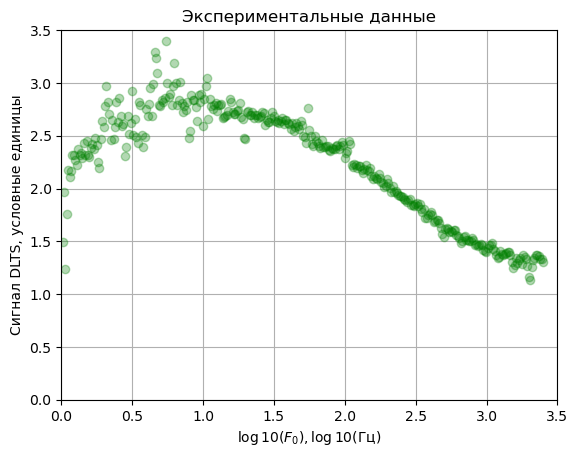

In [17]:
fig, ax = plot_experimental_points(X_train, y_train)
ax.set_ylim([0, 3.5])
ax.set_xlim([0, 3.5])
plt.show()

### 2.2. Идентификация моноэкспоненциальной модели с показателем $p$

In [18]:
monoexp_fs = SklSingleExpFrequencyScan(filling_pulse = filling_pulse,
                                       learning_rate = 0.05,
                                       stop_val = 10**-5,
                                       verbose = False
                                      )

monoexp_fs.fit(X = X_train, y = y_train)
monoexp_fs.fit_results_

2022-09-24 09:45:26.102431: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 09:45:26.102450: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 09:45:26.102454: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 09:45:26.102572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 09:45:26.102584: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 09:45:26.102587: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 09:45:26.102848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,-0.130992,0.00001,True,0.05,5.548017,1,1000,1.000000,0.00001,-1.689811,False
1,-0.028659,0.00001,True,0.05,5.341145,1,1000,1.006454,0.00001,-1.691994,False
2,0.070619,0.00001,True,0.05,5.146722,1,1000,1.007833,0.00001,-1.692472,False
3,0.167209,0.00001,True,0.05,4.961999,1,1000,1.004492,0.00001,-1.691294,False
4,0.261428,0.00001,True,0.05,4.784659,1,1000,0.996665,0.00001,-1.688508,False
...,...,...,...,...,...,...,...,...,...,...,...
135,2.877408,0.00001,True,0.05,0.018106,1,1000,0.172655,0.00001,-1.263609,False
136,2.878180,0.00001,True,0.05,0.018094,1,1000,0.172778,0.00001,-1.263652,False
137,2.878928,0.00001,True,0.05,0.018082,1,1000,0.172896,0.00001,-1.263696,False
138,2.879650,0.00001,True,0.05,0.018072,1,1000,0.173011,0.00001,-1.263742,False


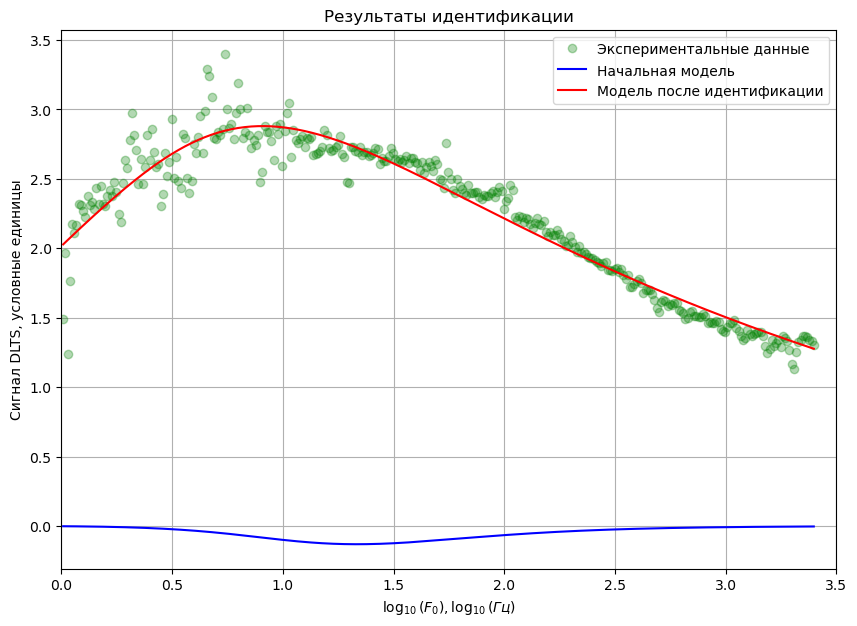

In [19]:
fig, ax = plot_model(X_train, y_train, SklSingleExpFrequencyScan, monoexp_fs.fit_results_, plot_exps=False)
plt.show()

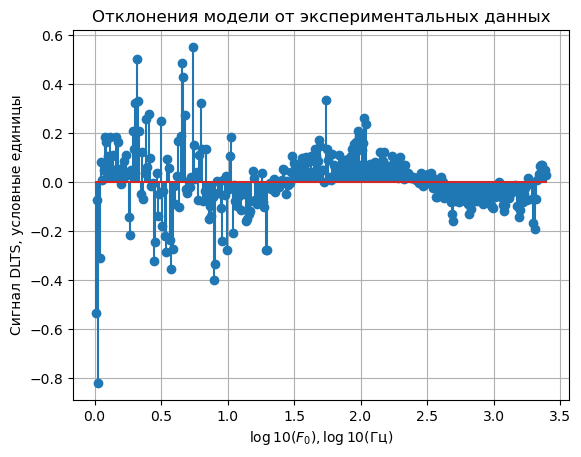

In [20]:
plot_deviations(X_train, y_train, monoexp_fs.predict(X_train))
plt.show()

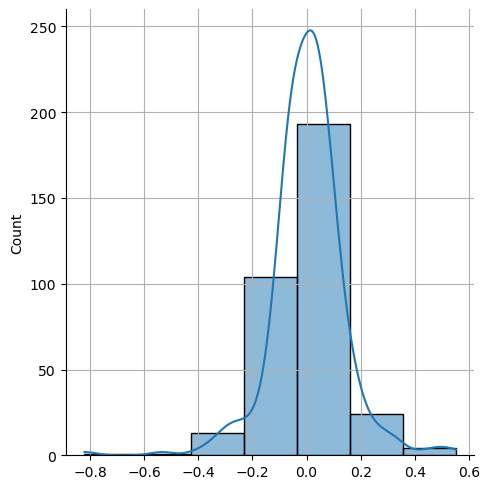

In [21]:
sns.displot(x=y_train - monoexp_fs.predict(X_train), bins=7, kde=True)
plt.grid()
plt.show()

In [22]:
mean_squared_error(y_train, y_train - monoexp_fs.predict(X_train), squared=False)

2.2863664067391687

### 2.3. Идентификация мультиэкспоненциальной модели с n_exps=1

In [23]:
multiexp_fs = SklMultiExpFrequencyScan(n_exps = 1,
                                       filling_pulse = filling_pulse,
                                       stop_val = 10**-5,
                                       learning_rate=0.05,
                                      )

multiexp_fs.fit(X=X_train, y=y_train)

SklMultiExpFrequencyScan(filling_pulse=9.999999999999999e-06,
                         learning_rate=0.05, stop_val=1e-05)

In [24]:
multiexp_fs.fit_results_

,amplitude_0,filling_pulse,learning_rate,loss,n_exps,n_iters,stop_val,time_constant_pow_0,verbose
0,-0.272834,0.00001,0.05,5.763416,1,1000,0.00001,-2.287453,False
1,-0.181469,0.00001,0.05,5.597676,1,1000,0.00001,-2.296077,False
2,-0.092780,0.00001,0.05,5.442094,1,1000,0.00001,-2.301840,False
3,-0.006607,0.00001,0.05,5.295521,1,1000,0.00001,-2.304794,False
4,0.077204,0.00001,0.05,5.156893,1,1000,0.00001,-2.305005,False
...,...,...,...,...,...,...,...,...,...
190,3.831039,0.00001,0.05,1.345598,1,1000,0.00001,-1.340013,False
191,3.831809,0.00001,0.05,1.345586,1,1000,0.00001,-1.340012,False
192,3.832559,0.00001,0.05,1.345575,1,1000,0.00001,-1.340011,False
193,3.833289,0.00001,0.05,1.345564,1,1000,0.00001,-1.340009,False


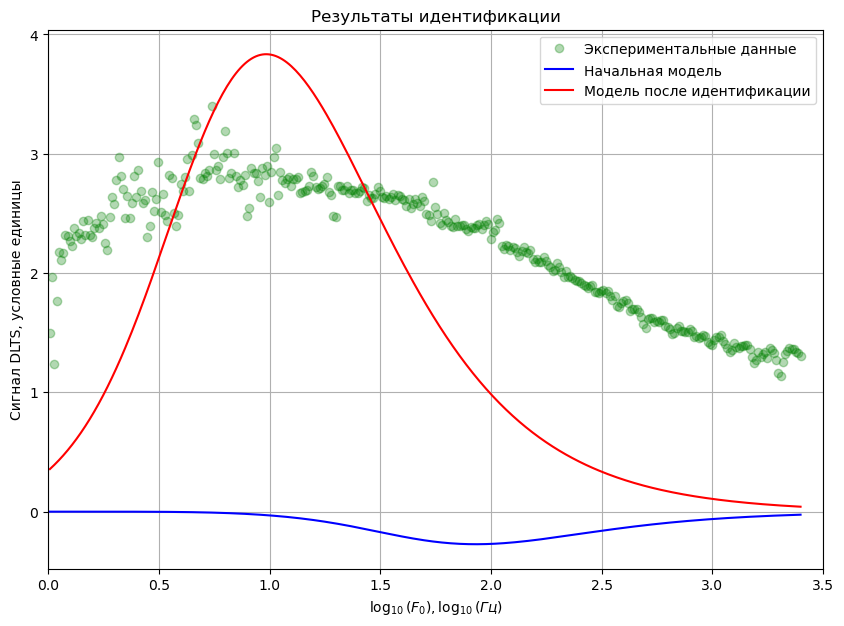

In [25]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, multiexp_fs.fit_results_, plot_exps=False)
plt.show()

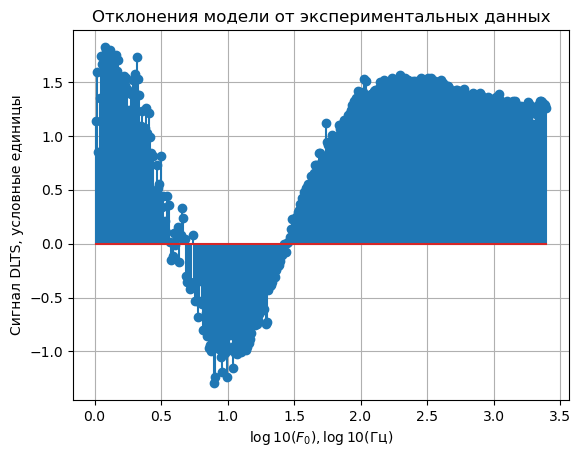

In [26]:
plot_deviations(X_train, y_train, multiexp_fs.predict(X_train))
plt.show()

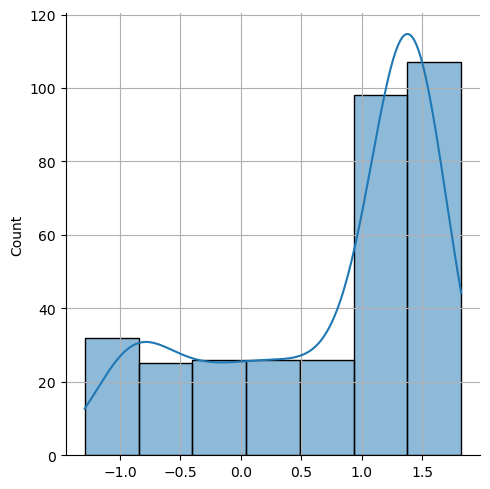

In [27]:
sns.displot(x=y_train - multiexp_fs.predict(X_train), bins=7, kde=True)
plt.grid()
plt.show()

In [28]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

In [29]:
scores = cross_val_score(multiexp_fs, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

display_scores(np.sqrt(-scores))

2022-09-24 09:46:10.168655: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 09:46:10.168679: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 09:46:10.168683: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 09:46:10.168780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 09:46:10.168792: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 09:46:10.168795: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 09:46:10.168893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

Scores: [1.73452194 2.14387395 2.36582374]
Mean: 2.0814065458044304
Standard deviation: 0.2614856569369637


In [30]:
mean_squared_error(y_train, multiexp_fs.predict(X_train), squared=False)

1.1599803555783221

### 2.4. Идентификация мультиэкспоненциальной модели с n_exps>1

In [31]:
multiexp_fs = SklMultiExpFrequencyScan(n_exps = 1,
                                       filling_pulse = filling_pulse,
                                       learning_rate = 0.05,
                                       stop_val = 10**-5
                                      )

In [32]:
param_grid = {'n_exps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(multiexp_fs, param_grid, cv=3, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [33]:
grid_search.fit(X_train, y_train)

2022-09-24 09:46:38.783598: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 09:46:38.783623: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 09:46:38.783627: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 09:46:38.783760: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 09:46:38.783774: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 09:46:38.783777: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 09:46:38.783944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

GridSearchCV(cv=3,
             estimator=SklMultiExpFrequencyScan(filling_pulse=9.999999999999999e-06,
                                                learning_rate=0.05,
                                                stop_val=1e-05),
             n_jobs=-1, param_grid={'n_exps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_params_

{'n_exps': 10}

In [35]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

2.0181798910045186 {'n_exps': 1}
1.5115013186002146 {'n_exps': 2}
1.0599497724380826 {'n_exps': 3}
1.0366939204747916 {'n_exps': 4}
1.049674549443784 {'n_exps': 5}
1.044102676808008 {'n_exps': 6}
1.0576904742186728 {'n_exps': 7}
1.0996897433734163 {'n_exps': 8}
1.0887024700567878 {'n_exps': 9}
0.8916572706593664 {'n_exps': 10}


In [36]:
y_pred = grid_search.best_estimator_.predict(X_train)

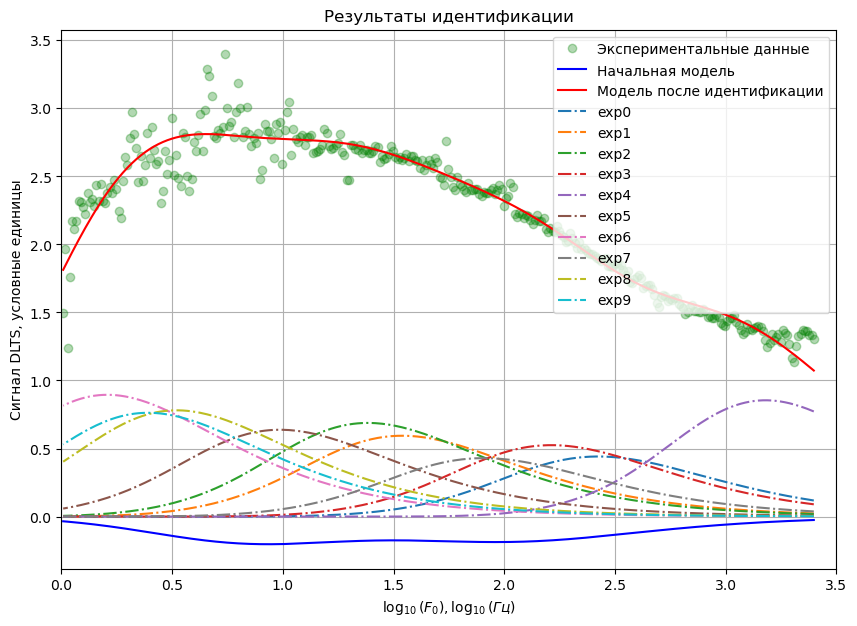

In [37]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, grid_search.best_estimator_.fit_results_)

plt.show()

In [38]:
grid_search.best_estimator_.fit_results_

,amplitude_0,amplitude_1,amplitude_2,amplitude_3,amplitude_4,amplitude_5,amplitude_6,amplitude_7,amplitude_8,amplitude_9,...,time_constant_pow_1,time_constant_pow_2,time_constant_pow_3,time_constant_pow_4,time_constant_pow_5,time_constant_pow_6,time_constant_pow_7,time_constant_pow_8,time_constant_pow_9,verbose
0,-0.078069,-0.021936,0.035671,0.038374,-0.031429,-0.081576,-0.057652,-0.085124,0.000257,-0.081101,...,-1.965100,-1.803069,-2.467169,-2.713109,-1.451910,-1.046771,-2.314270,-1.324861,-1.218239,False
1,0.002516,0.077859,0.139243,0.122243,0.042707,0.026960,0.046853,0.004211,0.108983,0.026849,...,-1.965663,-1.802320,-2.465724,-2.714433,-1.452374,-1.045102,-2.317193,-1.324862,-1.217283,False
2,0.068029,0.158403,0.223260,0.190292,0.103594,0.116720,0.136083,0.076246,0.199763,0.117753,...,-1.963922,-1.799502,-2.462322,-2.713133,-1.452075,-1.045925,-2.317083,-1.324357,-1.217352,False
3,0.121350,0.223189,0.291227,0.245457,0.153761,0.190948,0.212648,0.134228,0.275668,0.194510,...,-1.960849,-1.795180,-2.458567,-2.710974,-1.450293,-1.047015,-2.315599,-1.322225,-1.216764,False
4,0.164776,0.275056,0.346000,0.290105,0.195225,0.252310,0.278608,0.180764,0.339222,0.259475,...,-1.957112,-1.789816,-2.455371,-2.708981,-1.446768,-1.047049,-2.313755,-1.317971,-1.214617,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.440976,0.594133,0.688153,0.524330,0.853373,0.637606,0.894772,0.429023,0.780895,0.762709,...,-1.894275,-1.740383,-2.569043,-3.549709,-1.342526,-0.563289,-2.262087,-0.875301,-0.746922,False
304,0.441098,0.594115,0.688147,0.524446,0.853674,0.637697,0.894789,0.429086,0.780881,0.762698,...,-1.894301,-1.740234,-2.569086,-3.550265,-1.342540,-0.563138,-2.262198,-0.875354,-0.746848,False
305,0.441220,0.594096,0.688142,0.524562,0.853972,0.637787,0.894805,0.429147,0.780867,0.762687,...,-1.894327,-1.740085,-2.569130,-3.550816,-1.342553,-0.562988,-2.262310,-0.875407,-0.746775,False
306,0.441341,0.594077,0.688137,0.524678,0.854268,0.637878,0.894821,0.429209,0.780854,0.762676,...,-1.894354,-1.739935,-2.569173,-3.551364,-1.342566,-0.562838,-2.262421,-0.875461,-0.746701,False


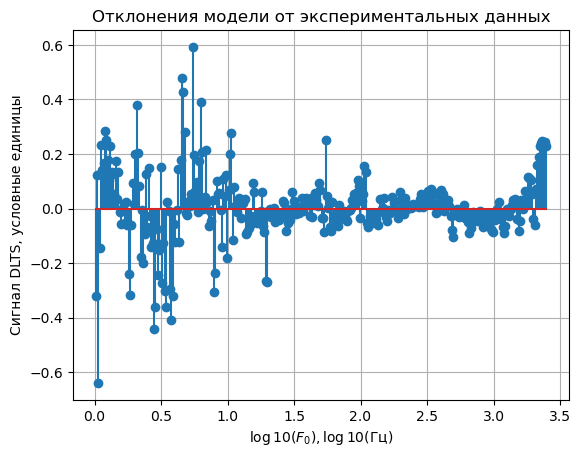

In [39]:
plot_deviations(X_train, y_train, y_pred)
plt.show()

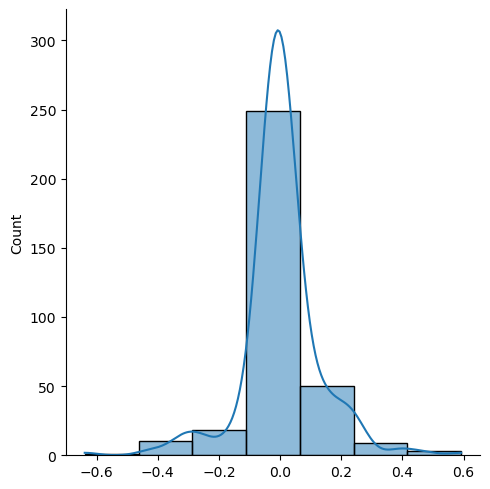

In [40]:
sns.displot(x=y_train - y_pred, bins=7, kde=True)
plt.show()

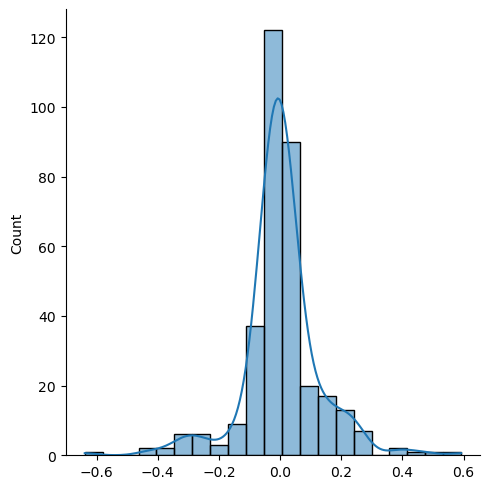

In [41]:
sns.displot(x=y_train - y_pred, bins=21, kde=True)
plt.show()

In [42]:
exps_params_303 = grid_search.best_estimator_.exps_params_
exps_params_303[:, 1] = exps_params_303[:, 1] / k

## 3. 1564ЛЕ1№1\_п1\_2500Гц-1Гц\_1пФ\_+10С\_-4В-5В\_50мВ\_10мкс\_шаг\_0,01.csv
### 3.1. Подготовка экспериментальных данных

In [43]:
filling_pulse, X_train, y_train = get_X_y(data_frames[1][1])

In [44]:
k, y_train = normalize(X_train, y_train)
k

180.3577499295137

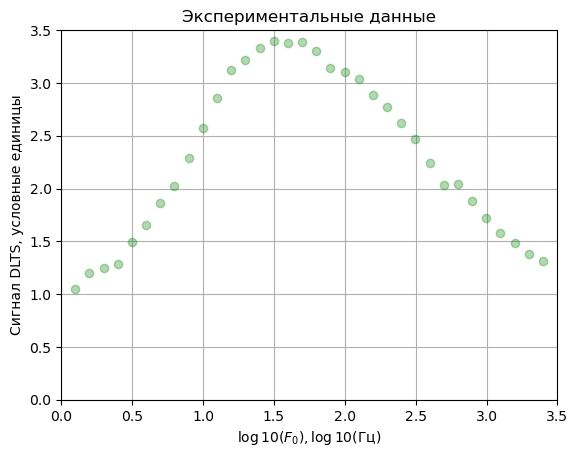

In [45]:
fig, ax = plot_experimental_points(X_train, y_train)
ax.set_ylim([0, 3.5])
ax.set_xlim([0, 3.5])
plt.show()

### 3.2. Идентификация моноэкспоненциальной модели с показателем $p$

In [46]:
monoexp_fs = SklSingleExpFrequencyScan(filling_pulse = filling_pulse,
                                       learning_rate = 0.05,
                                       stop_val = 10**-5,
                                       verbose = False
                                      )

monoexp_fs.fit(X = X_train, y = y_train)
monoexp_fs.fit_results_

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,0.037519,0.00001,True,0.05,5.830280,1,1000,1.000000,0.00001,-1.337463,False
1,0.134911,0.00001,True,0.05,5.642590,1,1000,0.998146,0.00001,-1.339328,False
2,0.229910,0.00001,True,0.05,5.461494,1,1000,0.991558,0.00001,-1.346018,False
3,0.323035,0.00001,True,0.05,5.283297,1,1000,0.980390,0.00001,-1.357330,False
4,0.414752,0.00001,True,0.05,5.104733,1,1000,0.964683,0.00001,-1.373013,False
...,...,...,...,...,...,...,...,...,...,...,...
157,3.337119,0.00001,True,0.05,0.014218,1,1000,0.275193,0.00001,-1.920400,False
158,3.337872,0.00001,True,0.05,0.014207,1,1000,0.275320,0.00001,-1.920376,False
159,3.338604,0.00001,True,0.05,0.014196,1,1000,0.275444,0.00001,-1.920353,False
160,3.339316,0.00001,True,0.05,0.014186,1,1000,0.275564,0.00001,-1.920331,False


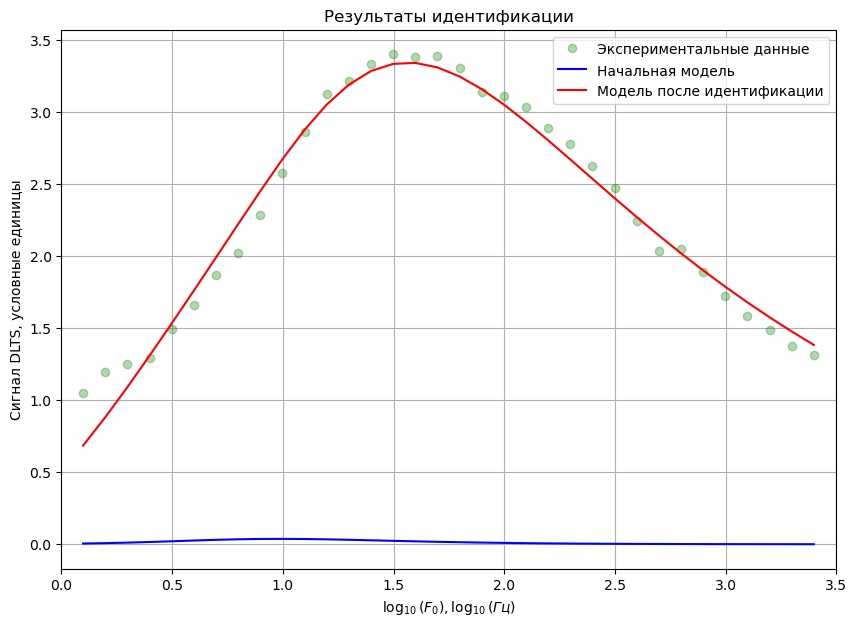

In [47]:
fig, ax = plot_model(X_train, y_train, SklSingleExpFrequencyScan, monoexp_fs.fit_results_, plot_exps=False)
plt.show()

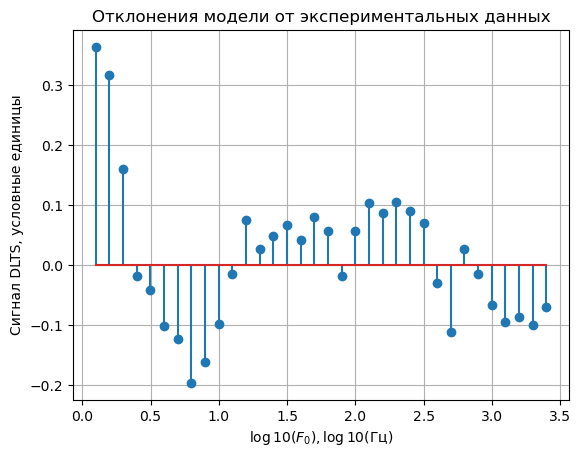

In [48]:
plot_deviations(X_train, y_train, monoexp_fs.predict(X_train))
plt.show()

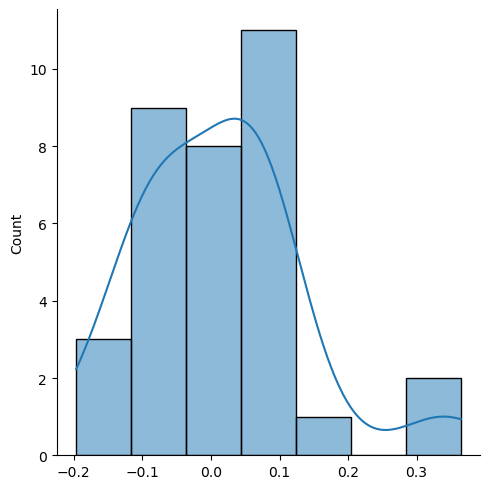

In [49]:
sns.displot(x=y_train - monoexp_fs.predict(X_train), bins=7, kde=True)
plt.show()

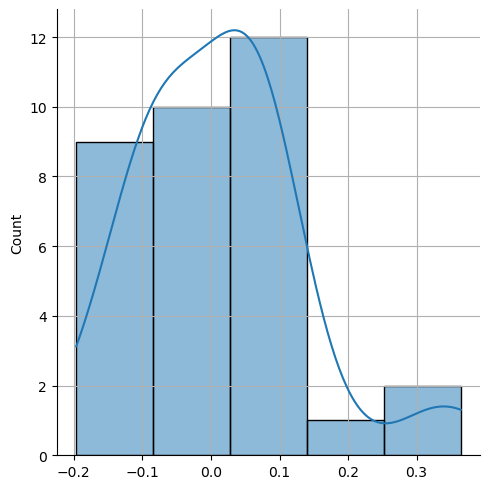

In [50]:
sns.displot(x=y_train - monoexp_fs.predict(X_train), bins=5, kde=True)
plt.grid()
plt.show()

In [51]:
mean_squared_error(y_train, y_train - monoexp_fs.predict(X_train), squared=False)

2.4175655353953105

### 3.3. Идентификация мультиэкспоненциальной модели с n_exps=1

In [52]:
multiexp_fs = SklMultiExpFrequencyScan(n_exps = 1,
                                       filling_pulse = filling_pulse,
                                       stop_val = 10**-5,
                                       learning_rate=0.05,
                                      )

multiexp_fs.fit(X=X_train, y=y_train)

SklMultiExpFrequencyScan(filling_pulse=9.999999999999999e-06,
                         learning_rate=0.05, stop_val=1e-05)

In [53]:
multiexp_fs.fit_results_

,amplitude_0,filling_pulse,learning_rate,loss,n_exps,n_iters,stop_val,time_constant_pow_0,verbose
0,-0.477447,0.00001,0.05,6.396012,1,1000,0.00001,-3.475441,False
1,-0.421077,0.00001,0.05,6.315880,1,1000,0.00001,-3.507322,False
2,-0.368018,0.00001,0.05,6.247018,1,1000,0.00001,-3.535282,False
3,-0.317883,0.00001,0.05,6.187485,1,1000,0.00001,-3.559540,False
4,-0.270315,0.00001,0.05,6.135624,1,1000,0.00001,-3.580313,False
...,...,...,...,...,...,...,...,...,...
217,4.296524,0.00001,0.05,0.961442,1,1000,0.00001,-1.931471,False
218,4.297285,0.00001,0.05,0.961431,1,1000,0.00001,-1.931471,False
219,4.298025,0.00001,0.05,0.961420,1,1000,0.00001,-1.931472,False
220,4.298746,0.00001,0.05,0.961410,1,1000,0.00001,-1.931473,False


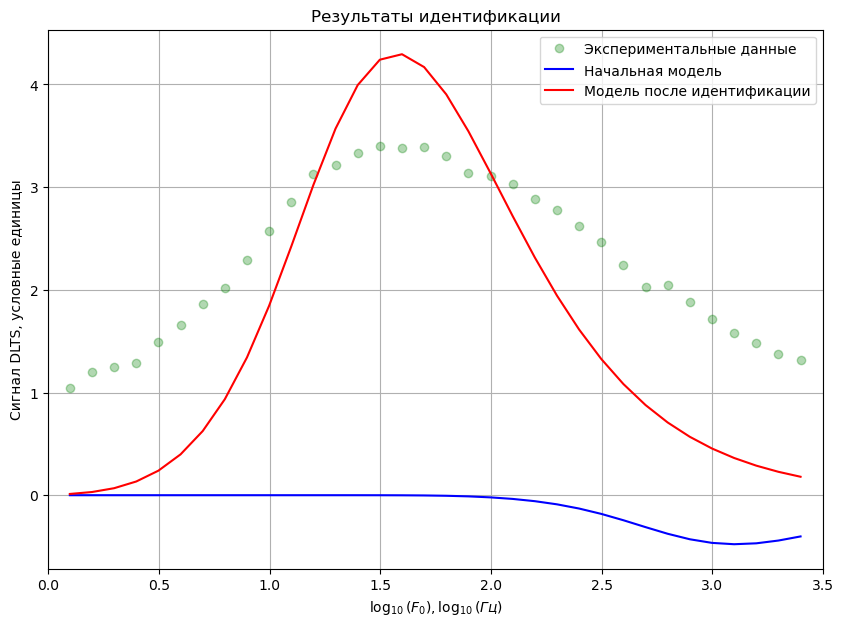

In [54]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, multiexp_fs.fit_results_, plot_exps=False)
plt.show()

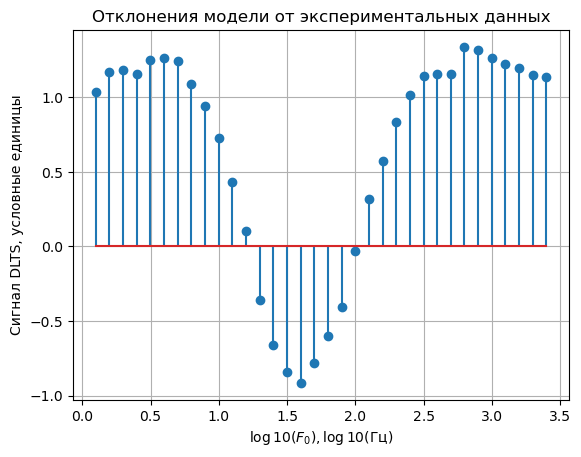

In [55]:
plot_deviations(X_train, y_train, multiexp_fs.predict(X_train))
plt.show()

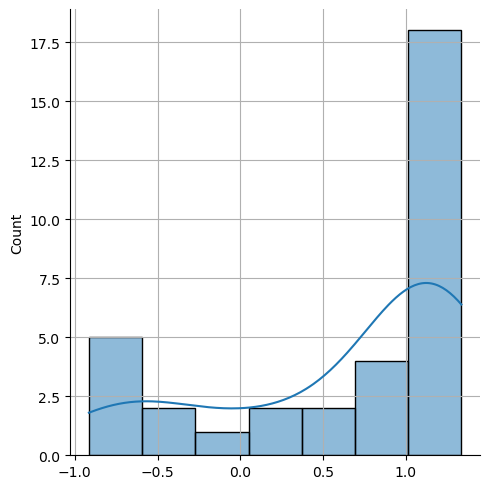

In [56]:
sns.displot(x=y_train - multiexp_fs.predict(X_train), bins=7, kde=True)
plt.grid()
plt.show()

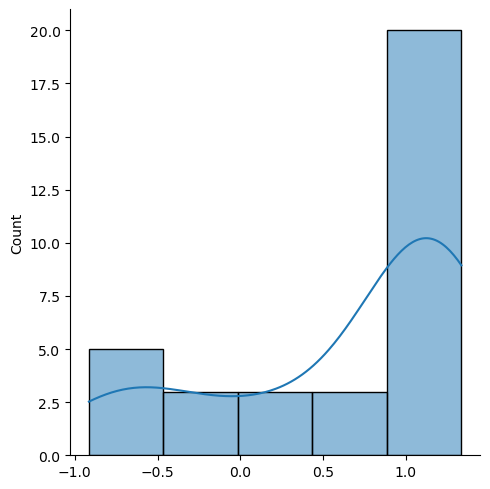

In [57]:
sns.displot(x=y_train - multiexp_fs.predict(X_train), bins=5, kde=True)
plt.show()

In [58]:
scores = cross_val_score(multiexp_fs, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

display_scores(np.sqrt(-scores))

2022-09-24 10:09:47.658806: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 10:09:47.658830: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 10:09:47.658834: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 10:09:47.658952: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 10:09:47.658965: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 10:09:47.658968: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 10:09:47.659096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

Scores: [1.42488523 3.02060095 1.46127629]
Mean: 1.96892082303263
Standard deviation: 0.7437985372126062


In [59]:
mean_squared_error(y_train, multiexp_fs.predict(X_train), squared=False)

0.9805100198326316

### 3.4. Идентификация мультиэкспоненциальной модели с n_exps>1

In [60]:
multiexp_fs = SklMultiExpFrequencyScan(n_exps = 1,
                                       filling_pulse = filling_pulse,
                                       learning_rate = 0.05,
                                       stop_val = 10**-5
                                      )

In [61]:
param_grid = {'n_exps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(multiexp_fs, param_grid, cv=3, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [62]:
grid_search.fit(X_train, y_train)

2022-09-24 10:11:29.076466: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 10:11:29.076627: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 10:11:29.076636: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 10:11:29.076889: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 10:11:29.076945: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 10:11:29.076980: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 10:11:29.077212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

GridSearchCV(cv=3,
             estimator=SklMultiExpFrequencyScan(filling_pulse=9.999999999999999e-06,
                                                learning_rate=0.05,
                                                stop_val=1e-05),
             n_jobs=-1, param_grid={'n_exps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
grid_search.best_params_

{'n_exps': 10}

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.8887349121420665 {'n_exps': 1}
1.2473716759354208 {'n_exps': 2}
0.5828657013813416 {'n_exps': 3}
0.580062426500194 {'n_exps': 4}
0.5870154422851337 {'n_exps': 5}
0.5378249126653899 {'n_exps': 6}
0.5431458702797233 {'n_exps': 7}
0.4595614522359644 {'n_exps': 8}
0.4335053132449306 {'n_exps': 9}
0.31870554349021757 {'n_exps': 10}


In [65]:
y_pred = grid_search.best_estimator_.predict(X_train)

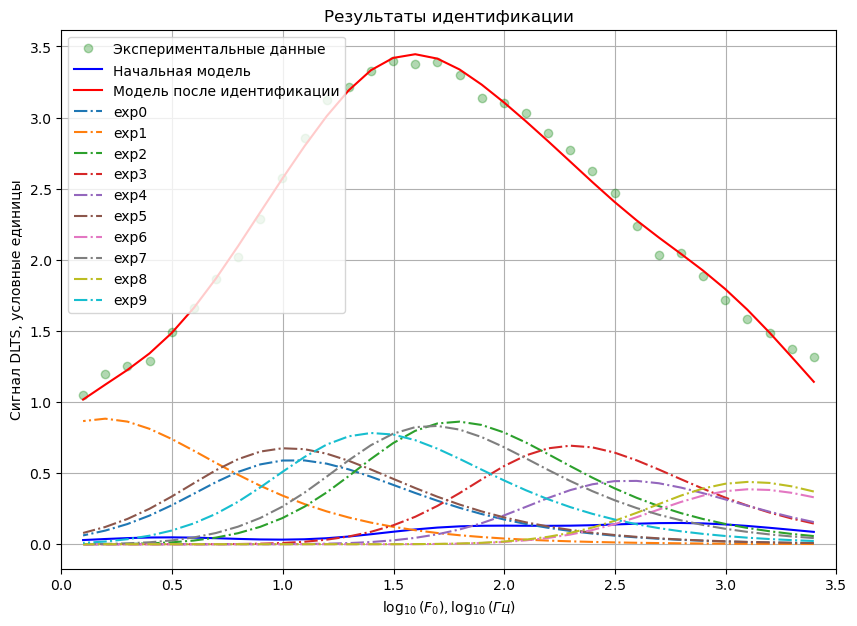

In [66]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, grid_search.best_estimator_.fit_results_)

plt.show()

In [67]:
grid_search.best_estimator_.fit_results_

,amplitude_0,amplitude_1,amplitude_2,amplitude_3,amplitude_4,amplitude_5,amplitude_6,amplitude_7,amplitude_8,amplitude_9,...,time_constant_pow_1,time_constant_pow_2,time_constant_pow_3,time_constant_pow_4,time_constant_pow_5,time_constant_pow_6,time_constant_pow_7,time_constant_pow_8,time_constant_pow_9,verbose
0,-0.070433,0.080479,0.093917,0.000377,0.023327,0.025210,0.018659,0.057982,0.076871,-0.035850,...,-1.010354,-2.178762,-2.790664,-3.149435,-1.240989,-3.306352,-2.129119,-3.305358,-1.893090,False
1,0.022723,0.158209,0.201030,0.082391,0.085433,0.116264,0.071773,0.166185,0.130042,0.074675,...,-1.015312,-2.176501,-2.790643,-3.148075,-1.242328,-3.305256,-2.127948,-3.300844,-1.893061,False
2,0.103252,0.225853,0.293592,0.152481,0.138192,0.195194,0.116802,0.259715,0.175287,0.170389,...,-1.023664,-2.172123,-2.786761,-3.143779,-1.247669,-3.301660,-2.124885,-3.294326,-1.893071,False
3,0.172984,0.284847,0.373563,0.212475,0.183079,0.263715,0.155035,0.340533,0.213826,0.253208,...,-1.033828,-2.166397,-2.780431,-3.137790,-1.255377,-3.296676,-2.120568,-3.286839,-1.893011,False
4,0.233366,0.336319,0.442565,0.263845,0.221277,0.323188,0.187509,0.410266,0.246649,0.324732,...,-1.044671,-2.159938,-2.772681,-3.130966,-1.264258,-3.291060,-2.115523,-3.279078,-1.892840,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0.592066,0.882160,0.862711,0.692179,0.446489,0.675808,0.386736,0.833329,0.438367,0.782579,...,-0.546935,-2.136576,-2.664505,-2.916520,-1.380048,-3.488743,-2.027111,-3.479349,-1.770740,False
545,0.592072,0.882332,0.862648,0.692369,0.446602,0.675810,0.386732,0.833264,0.438356,0.782580,...,-0.546749,-2.136717,-2.664602,-2.916221,-1.380165,-3.489037,-2.027014,-3.479672,-1.770535,False
546,0.592077,0.882503,0.862584,0.692558,0.446715,0.675811,0.386728,0.833199,0.438345,0.782582,...,-0.546563,-2.136859,-2.664699,-2.915923,-1.380282,-3.489331,-2.026916,-3.479993,-1.770331,False
547,0.592083,0.882674,0.862521,0.692746,0.446828,0.675812,0.386724,0.833134,0.438334,0.782584,...,-0.546378,-2.136999,-2.664795,-2.915625,-1.380398,-3.489624,-2.026819,-3.480314,-1.770128,False


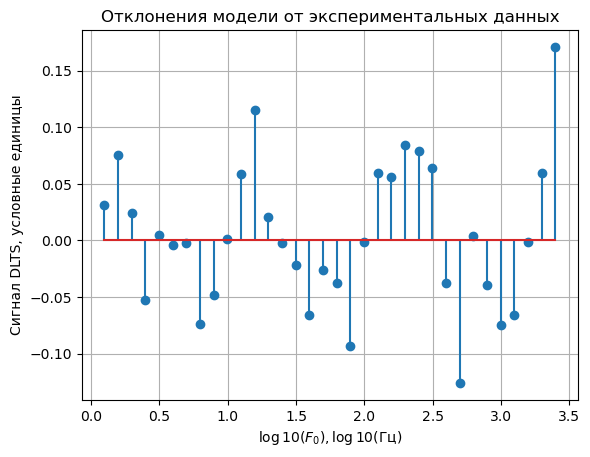

In [68]:
plot_deviations(X_train, y_train, y_pred)
plt.show()

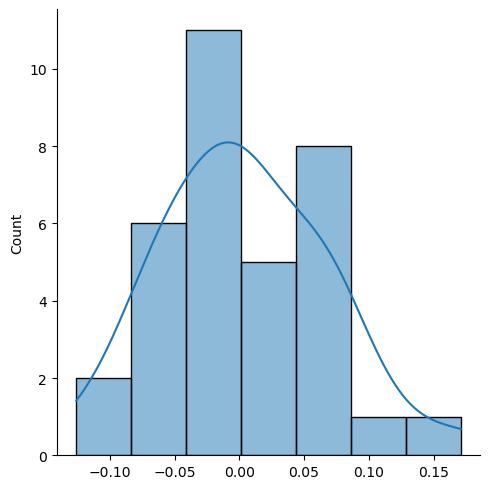

In [69]:
sns.displot(x=y_train - y_pred, bins=7, kde=True)
plt.show()

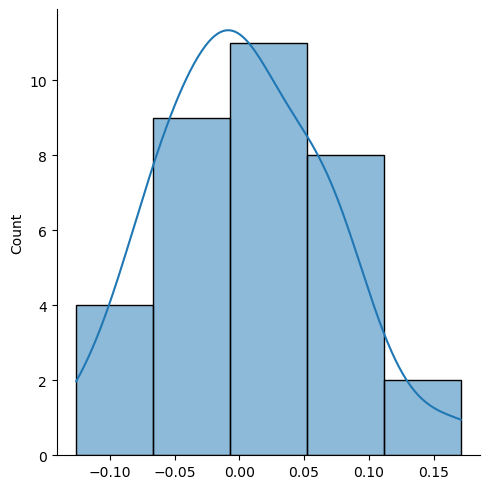

In [70]:
sns.displot(x=y_train - y_pred, bins=5, kde=True)
plt.show()

In [71]:
exps_params_283 = grid_search.best_estimator_.exps_params_
exps_params_283[:, 1] = exps_params_283[:, 1] / k

In [72]:
mean_squared_error(y_train, y_pred, squared=False)

0.06327774673918204

## 4. 1564ЛЕ1№1\_п1\_2500Гц-1Гц\_1пФ\_-10С\_-4В-5В\_10мВ\_10мкс\_шаг\_0,01.csv
### 4.1. Подготовка экспериментальных данных

In [73]:
filling_pulse, X_train, y_train = get_X_y(data_frames[2][1])

In [74]:
k, y_train = normalize(X_train, y_train)
k

5098.184559147843

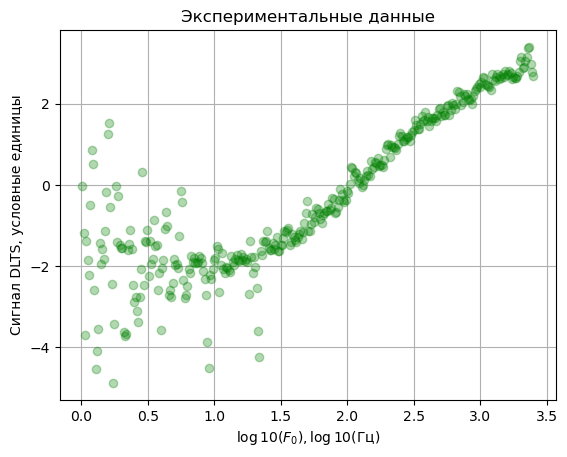

In [75]:
fig, ax = plot_experimental_points(X_train, y_train)
plt.show()

### 4.2. Идентификация моноэкспоненциальной модели с показателем $p$

In [76]:
monoexp_fs = SklSingleExpFrequencyScan(filling_pulse = filling_pulse,
                                       learning_rate = 0.05,
                                       stop_val = 10**-5,
                                       verbose = False
                                      )

monoexp_fs.fit(X = X_train, y = y_train)
monoexp_fs.fit_results_

,amplitude_0,filling_pulse,fit_p_coef,learning_rate,loss,n_exps,n_iters,p_coef,stop_val,time_constant_pow_0,verbose
0,-0.813168,0.00001,True,0.05,4.731632,1,1000,1.000000,0.00001,-3.304061,False
1,-0.739252,0.00001,True,0.05,4.620850,1,1000,1.009871,0.00001,-3.312237,False
2,-0.667231,0.00001,True,0.05,4.515954,1,1000,1.018580,0.00001,-3.320242,False
3,-0.597027,0.00001,True,0.05,4.416540,1,1000,1.026218,0.00001,-3.327969,False
4,-0.528566,0.00001,True,0.05,4.322244,1,1000,1.032866,0.00001,-3.335306,False
...,...,...,...,...,...,...,...,...,...,...,...
299,2.766273,0.00001,True,0.05,2.192725,1,1000,0.723712,0.00001,-3.581562,False
300,2.766859,0.00001,True,0.05,2.192714,1,1000,0.723400,0.00001,-3.581816,False
301,2.767439,0.00001,True,0.05,2.192704,1,1000,0.723088,0.00001,-3.582068,False
302,2.768013,0.00001,True,0.05,2.192694,1,1000,0.722776,0.00001,-3.582320,False


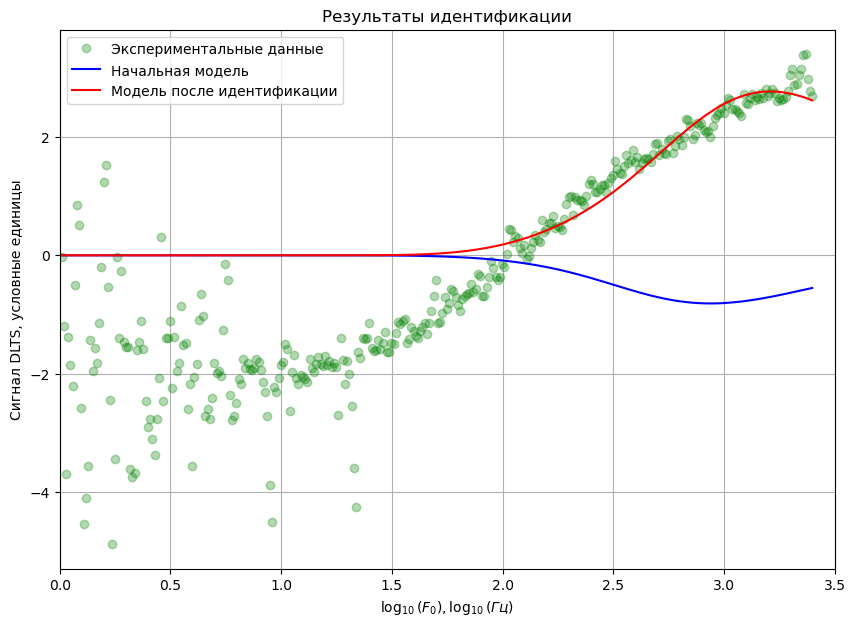

In [77]:
fig, ax = plot_model(X_train, y_train, SklSingleExpFrequencyScan, monoexp_fs.fit_results_, plot_exps=False)
plt.show()

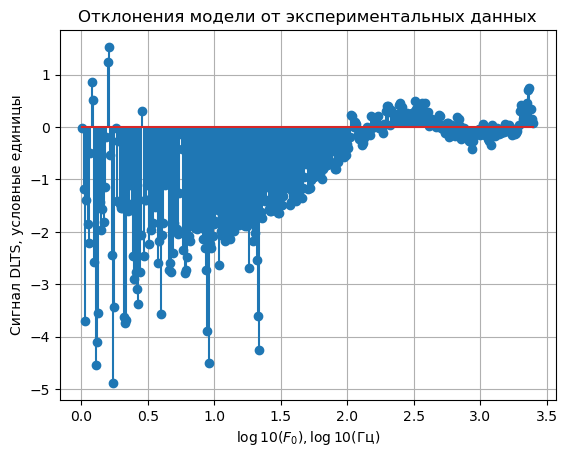

In [78]:
plot_deviations(X_train, y_train, monoexp_fs.predict(X_train))
plt.show()

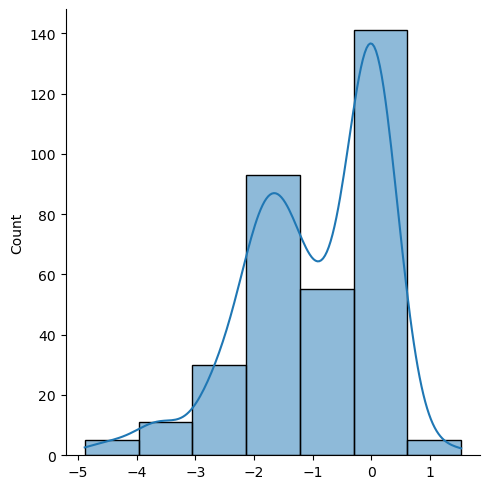

In [79]:
sns.displot(x=y_train - monoexp_fs.predict(X_train), bins=7, kde=True)
plt.show()

In [80]:
mean_squared_error(y_train, y_train - monoexp_fs.predict(X_train), squared=False)

1.2051807051891754

### 4.3. Идентификация мультиэкспоненциальной модели с n_exps=1

In [81]:
multiexp_fs = SklMultiExpFrequencyScan(n_exps = 1,
                                       filling_pulse = filling_pulse,
                                       stop_val = 10**-5,
                                       learning_rate=0.05,
                                      )

multiexp_fs.fit(X=X_train, y=y_train)

SklMultiExpFrequencyScan(filling_pulse=9.999999999999999e-06,
                         learning_rate=0.05, stop_val=1e-05)

In [82]:
multiexp_fs.fit_results_

,amplitude_0,filling_pulse,learning_rate,loss,n_exps,n_iters,stop_val,time_constant_pow_0,verbose
0,0.495079,0.00001,0.05,3.820774,1,1000,0.00001,-2.177355,False
1,0.473959,0.00001,0.05,3.778421,1,1000,0.00001,-2.219165,False
2,0.456937,0.00001,0.05,3.741471,1,1000,0.00001,-2.259397,False
3,0.443785,0.00001,0.05,3.708761,1,1000,0.00001,-2.298249,False
4,0.434284,0.00001,0.05,3.679256,1,1000,0.00001,-2.335927,False
...,...,...,...,...,...,...,...,...,...
257,2.748268,0.00001,0.05,2.201580,1,1000,0.00001,-3.489002,False
258,2.748991,0.00001,0.05,2.201569,1,1000,0.00001,-3.489111,False
259,2.749704,0.00001,0.05,2.201559,1,1000,0.00001,-3.489218,False
260,2.750406,0.00001,0.05,2.201549,1,1000,0.00001,-3.489323,False


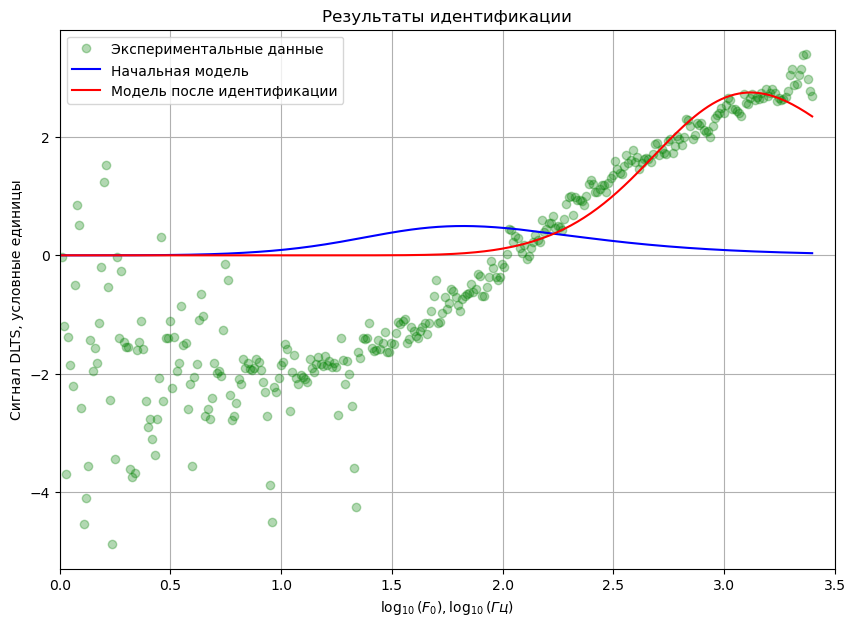

In [83]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, multiexp_fs.fit_results_, plot_exps=False)
plt.show()

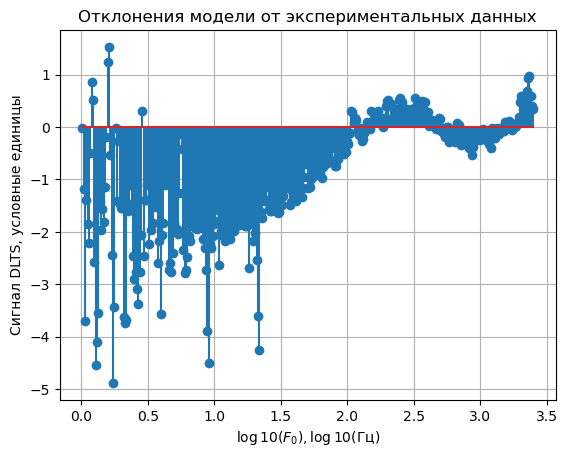

In [84]:
plot_deviations(X_train, y_train, multiexp_fs.predict(X_train))
plt.show()

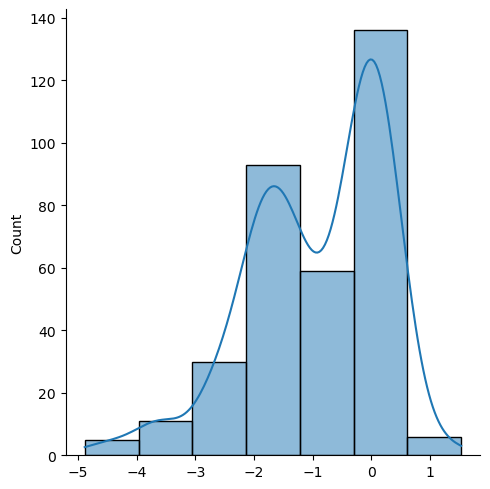

In [85]:
sns.displot(x=y_train - multiexp_fs.predict(X_train), bins=7, kde=True)
plt.show()

In [86]:
scores = cross_val_score(multiexp_fs, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
display_scores(np.sqrt(-scores))

2022-09-24 10:42:42.066380: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 10:42:42.066404: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 10:42:42.066408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 10:42:42.066505: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 10:42:42.066517: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 10:42:42.066521: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 10:42:42.066632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

Scores: [2.17267202 1.27560016 1.20974361]
Mean: 1.552671929235989
Standard deviation: 0.43922989953913394


In [87]:
mean_squared_error(y_train, multiexp_fs.predict(X_train), squared=False)

1.483758398419903

### 4.4. Идентификация мультиэкспоненциальной модели с n_exps>1

In [88]:
multiexp_fs = SklMultiExpFrequencyScan(n_exps = 1,
                                       filling_pulse = filling_pulse,
                                       learning_rate = 0.05,
                                       stop_val = 10**-5
                                      )

In [89]:
param_grid = {'n_exps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(multiexp_fs, param_grid, cv=3, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [90]:
grid_search.fit(X_train, y_train)

2022-09-24 10:44:50.797142: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-24 10:44:50.797178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-B550I
2022-09-24 10:44:50.797184: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-B550I
2022-09-24 10:44:50.797420: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-24 10:44:50.797445: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-24 10:44:50.797452: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-24 10:44:50.797669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

GridSearchCV(cv=3,
             estimator=SklMultiExpFrequencyScan(filling_pulse=9.999999999999999e-06,
                                                learning_rate=0.05,
                                                stop_val=1e-05),
             n_jobs=-1, param_grid={'n_exps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_params_

{'n_exps': 10}

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.8413941689965208 {'n_exps': 1}
1.8426671959956586 {'n_exps': 2}
1.643496286184189 {'n_exps': 3}
1.4351673685124895 {'n_exps': 4}
1.3431910369111038 {'n_exps': 5}
1.3832432408984257 {'n_exps': 6}
1.3807525494675628 {'n_exps': 7}
1.3684578468972755 {'n_exps': 8}
1.3622601225740774 {'n_exps': 9}
1.200216725741496 {'n_exps': 10}


In [93]:
y_pred = grid_search.best_estimator_.predict(X_train)

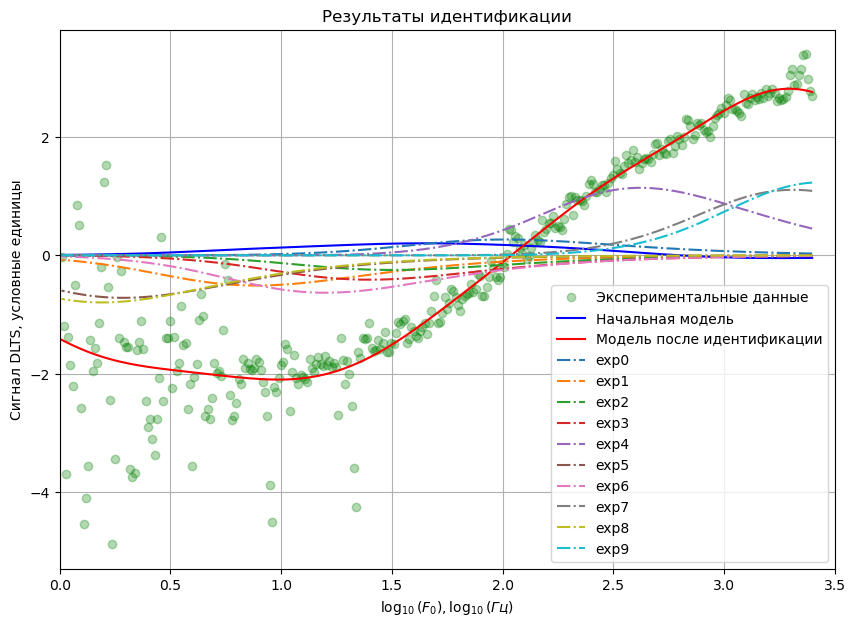

In [94]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, grid_search.best_estimator_.fit_results_)
plt.show()

In [95]:
grid_search.best_estimator_.fit_results_

,amplitude_0,amplitude_1,amplitude_2,amplitude_3,amplitude_4,amplitude_5,amplitude_6,amplitude_7,amplitude_8,amplitude_9,...,time_constant_pow_1,time_constant_pow_2,time_constant_pow_3,time_constant_pow_4,time_constant_pow_5,time_constant_pow_6,time_constant_pow_7,time_constant_pow_8,time_constant_pow_9,verbose
0,0.090586,0.043781,0.056698,0.031831,0.085540,0.025430,-0.086175,-0.070589,0.077848,-0.054266,...,-1.528172,-1.972417,-1.870319,-2.912706,-1.487762,-1.664228,-3.157044,-1.414126,-3.467751,False
1,0.073223,-0.014684,0.025994,-0.006622,0.129851,-0.034684,-0.137924,-0.016793,0.015146,-0.000673,...,-1.530047,-1.976897,-1.872630,-2.917272,-1.488750,-1.659420,-3.155529,-1.416577,-3.469159,False
2,0.061488,-0.065533,0.001764,-0.038200,0.173400,-0.087246,-0.182506,0.035048,-0.040063,0.050741,...,-1.529412,-1.978795,-1.872181,-2.923462,-1.487370,-1.652035,-3.155205,-1.417086,-3.469176,False
3,0.054125,-0.110053,-0.017331,-0.064265,0.215915,-0.133515,-0.221236,0.084804,-0.088971,0.099963,...,-1.526588,-1.978914,-1.869766,-2.930850,-1.483870,-1.642683,-3.155814,-1.415684,-3.467955,False
4,0.050156,-0.149287,-0.032332,-0.085878,0.257158,-0.174512,-0.255154,0.132379,-0.132553,0.146993,...,-1.521905,-1.977836,-1.865984,-2.939086,-1.478526,-1.631857,-3.157154,-1.412500,-3.465698,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.266963,-0.510729,-0.247092,-0.411644,1.139758,-0.717884,-0.632058,1.106150,-0.795772,1.233280,...,-1.241867,-1.859608,-1.754278,-2.982570,-0.642888,-1.553287,-3.688792,-0.547373,-3.824651,False
370,0.267070,-0.510684,-0.247127,-0.411701,1.140037,-0.717982,-0.632105,1.106425,-0.795887,1.233591,...,-1.241941,-1.859545,-1.754222,-2.982545,-0.642733,-1.553434,-3.689112,-0.547277,-3.824848,False
371,0.267176,-0.510639,-0.247162,-0.411757,1.140314,-0.718080,-0.632152,1.106698,-0.796000,1.233900,...,-1.242014,-1.859482,-1.754165,-2.982522,-0.642580,-1.553580,-3.689430,-0.547181,-3.825045,False
372,0.267281,-0.510595,-0.247196,-0.411812,1.140591,-0.718176,-0.632199,1.106969,-0.796112,1.234206,...,-1.242086,-1.859419,-1.754109,-2.982500,-0.642428,-1.553725,-3.689745,-0.547087,-3.825241,False


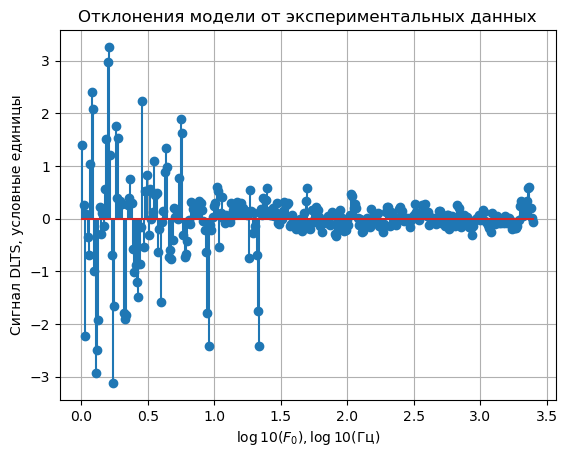

In [96]:
plot_deviations(X_train, y_train, y_pred)
plt.show()

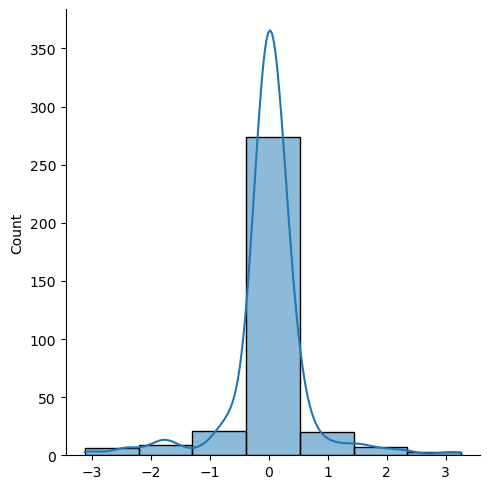

In [97]:
sns.displot(x=y_train - y_pred, bins=7, kde=True)
plt.show()

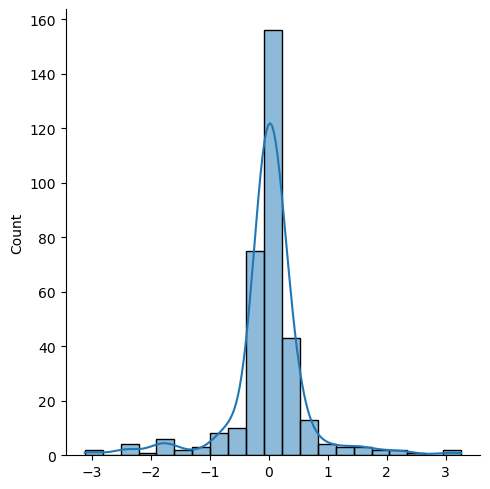

In [98]:
sns.displot(x=y_train - y_pred, bins=21, kde=True)
plt.show()

In [99]:
exps_params_263 = grid_search.best_estimator_.exps_params_
exps_params_263[:, 1] = exps_params_303[:, 1] / k